In [1]:
import os.path as op
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

bids_folder = '/Users/mrenke/data/ds-dnumrisk'
subjects = [int(f[4:]) for f in os.listdir(bids_folder) if f[0:3] == 'sub' and len(f) == 6]

#target_folder = op.join(bids_folder, 'derivatives', 'cogmodels_risk')



In [4]:
from numrisk.utils.data import get_data_majduge

df = get_data_majduge()

number of subjects found: 64


In [5]:
from utils import get_decoding_info

pred = []
for sub in subjects:
    pred.append(get_decoding_info(sub,bids_folder=bids_folder))

pred = pd.concat(pred).join(df, how='inner')

/Users/mrenke/data/ds-dnumrisk/derivatives/decoded_pdfs.volume.cv_vselect.denoise/sub-03/func/sub-03_ses-1_mask-NPC_R_space-T1w_pars.tsv


In [7]:
pred.head()

E  sd        rt    n1    n2  \
subject trial_nr session mask  n_voxels run                                  
13      1        1       NPC_R select   1    0.0 NaN  1.940046  14.0  11.0   
        2        1       NPC_R select   1    0.0 NaN  1.088813  14.0  15.0   
        3        1       NPC_R select   1    0.0 NaN  1.187995   7.0   8.0   
        4        1       NPC_R select   1    0.0 NaN  1.805343  14.0  10.0   
        5        1       NPC_R select   1    0.0 NaN  1.788309  10.0   6.0   

                                             choice  chose_n2      frac  \
subject trial_nr session mask  n_voxels run                               
13      1        1       NPC_R select   1     False     False  0.785714   
        2        1       NPC_R select   1      True      True  1.071429   
        3        1       NPC_R select   1      True      True  1.142857   
        4        1       NPC_R select   1     False     False  0.714286   
        5        1       NPC_R select   1     False     False  0.600000   

                                             log(n2/n1)   log(n1)  group  
subject trial_nr session mask  n_voxels run                               
13      1        1       NPC_R select   1     -0.241162  2.639057      1  
        2        1       NPC_R select   1      0.068993  2.639057      1  
        3        1       NPC_R select   1      0.133531  1.945910      1  
        4        1       NPC_R select   1     -0.336472  2.639057      1  
        5        1       NPC_R select   1     -0.510826  2.302585      1

In [8]:
import pingouin

r = pred.groupby(['subject', 'group']).apply(lambda d: pingouin.corr(d['E'], d['log(n1)']))

/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [19]:
r.index.names

FrozenList(['subject', 'group', None])

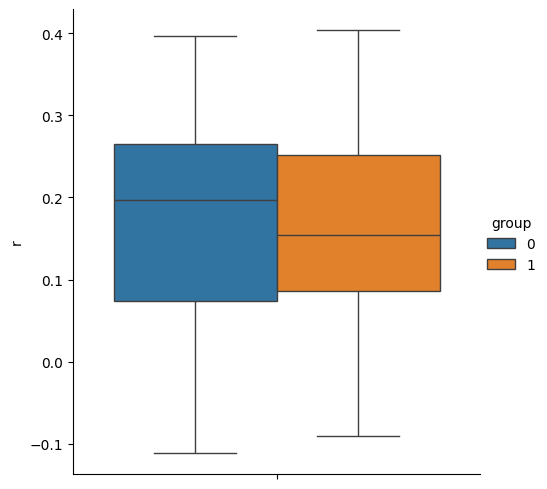

In [11]:
sns.catplot(data=r.reset_index(), hue='group', y='r', kind='box')

In [21]:
target_folder = '/Users/mrenke/data/ds-dnumrisk/derivatives/phenotype'

r.reset_index(['group', None])[['r']].to_csv(op.join(target_folder,'decoding_r.csv'))

In [20]:
r.reset_index(['group', None])

,group,level_2,n,r,CI95%,p-val,BF10,power
subject,,,,,,,,
1,0,pearson,180,-0.058083,"[-0.2, 0.09]",0.438643,0.126,0.121123
2,1,pearson,173,0.206071,"[0.06, 0.34]",0.006527,3.727,0.780216
4,1,pearson,178,-0.089840,"[-0.23, 0.06]",0.233035,0.19,0.222729
5,0,pearson,179,-0.023735,"[-0.17, 0.12]",0.752483,0.098,0.061401
6,1,pearson,180,0.062036,"[-0.08, 0.21]",0.408064,0.131,0.131454
...,...,...,...,...,...,...,...,...
60,0,pearson,180,0.229764,"[0.09, 0.36]",0.001917,11.045,0.877014
61,0,pearson,179,-0.095490,"[-0.24, 0.05]",0.203541,0.209,0.246814
62,0,pearson,179,0.305624,"[0.17, 0.43]",0.000032,499.349,0.987423
